In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

In [ ]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.11.11
Tensorflow version: 2.18.0
Keras version: 3.8.0


In [ ]:
%load_ext tensorboard

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Columns: 785 entries, label to pixel783
dtypes: float64(160), int64(625)
memory usage: 51.5 MB


(None, (8597, 785))

In [ ]:
test.info(),  test.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10914 entries, 0 to 10913
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(190), int64(594)
memory usage: 65.3 MB


(None, (10914, 784))

In [ ]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

In [ ]:
import numpy as np

print(np.isnan(X_tsn).sum())  # Count NaN values in the dataset

X_tsn = X_tsn[~np.isnan(X_tsn).any(axis=1)]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also use "median"
X_tsn = imputer.fit_transform(X_tsn)

from sklearn.manifold import TSNE

tsne = TSNE()
tsne_res = tsne.fit_transform(X_tsn)
print(np.isnan(X_tsn).sum())  # Should print 0


pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 784, dtype: int64
0


(8596, 2)
(8597,)


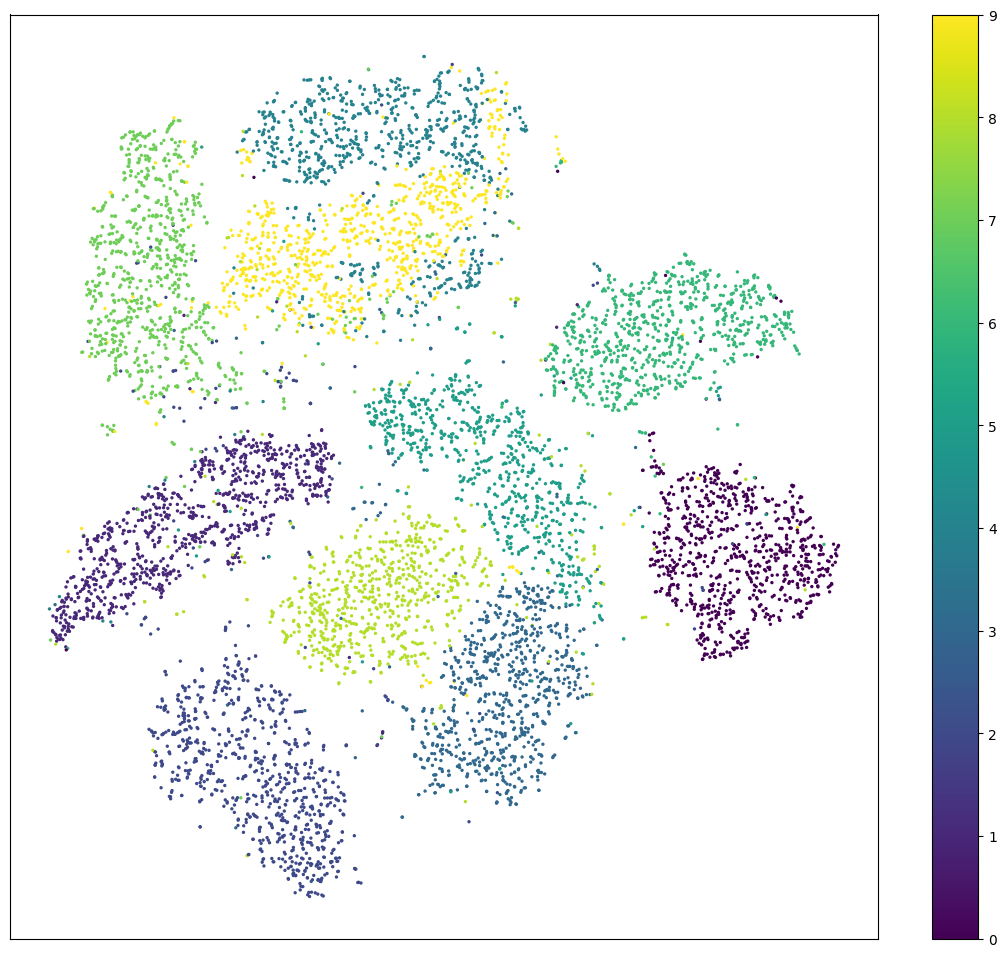

In [ ]:
print(tsne_res.shape)  # Should be (N, 2)
print(y.shape)         # Should be (N,)
y = y[:tsne_res.shape[0]]
y = y.astype(float)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y, cmap='viridis', s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()
import numpy as np

print(np.isnan(tsne_res).sum())  # Should be 0
print(np.isnan(y).sum())         # Should be 0
tsne_res = tsne_res[~np.isnan(tsne_res).any(axis=1)]
y = y[:tsne_res.shape[0]]  # Adjust shape again


In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)
y = y[:X.shape[0]]
X = X[:y.shape[0]]
print("After adjustment:")
print("X shape:", X.shape)
print("y shape:", y.shape)
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=1212
)


X shape: (8597, 784)
y shape: (8596,)
After adjustment:
X shape: (8596, 784)
y shape: (8596,)


In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (6876, 784)
y_train: (6876,)
X_validation: (1720, 784)
y_validation: (1720,)


In [ ]:
# Ensure X_train has the correct shape before reshaping
print("X_train shape before reshaping:", X_train.shape)

# Convert and reshape correctly
x_train_re = X_train.to_numpy().reshape(-1, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(-1, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(-1, 28, 28)

print("Shapes after reshaping:")
print("x_train_re:", x_train_re.shape)
print("x_validation_re:", x_validation_re.shape)
print("x_test_re:", x_test_re.shape)


X_train shape before reshaping: (6876, 784)
Shapes after reshaping:
x_train_re: (6876, 28, 28)
x_validation_re: (1720, 28, 28)
x_test_re: (10914, 28, 28)


In [ ]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (6876, 28, 28)
y_train: (6876,)
x_validation: (1720, 28, 28)
y_validation: (1720,)
x_test: (10914, 28, 28)


In [ ]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1  # Assuming grayscale images

print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)
print("x_train_re shape:", x_train_re.shape)
pd.DataFrame(x_train_re[0])

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1
x_train_re shape: (6876, 28, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,...,248.0,167.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,...,203.0,253.0,211.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0


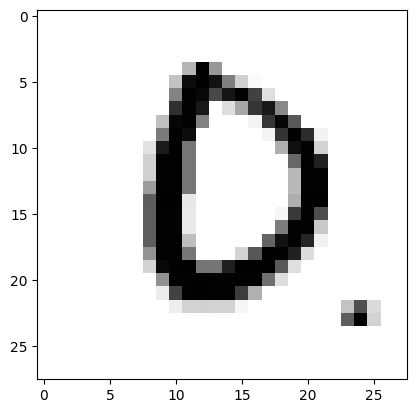

In [ ]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

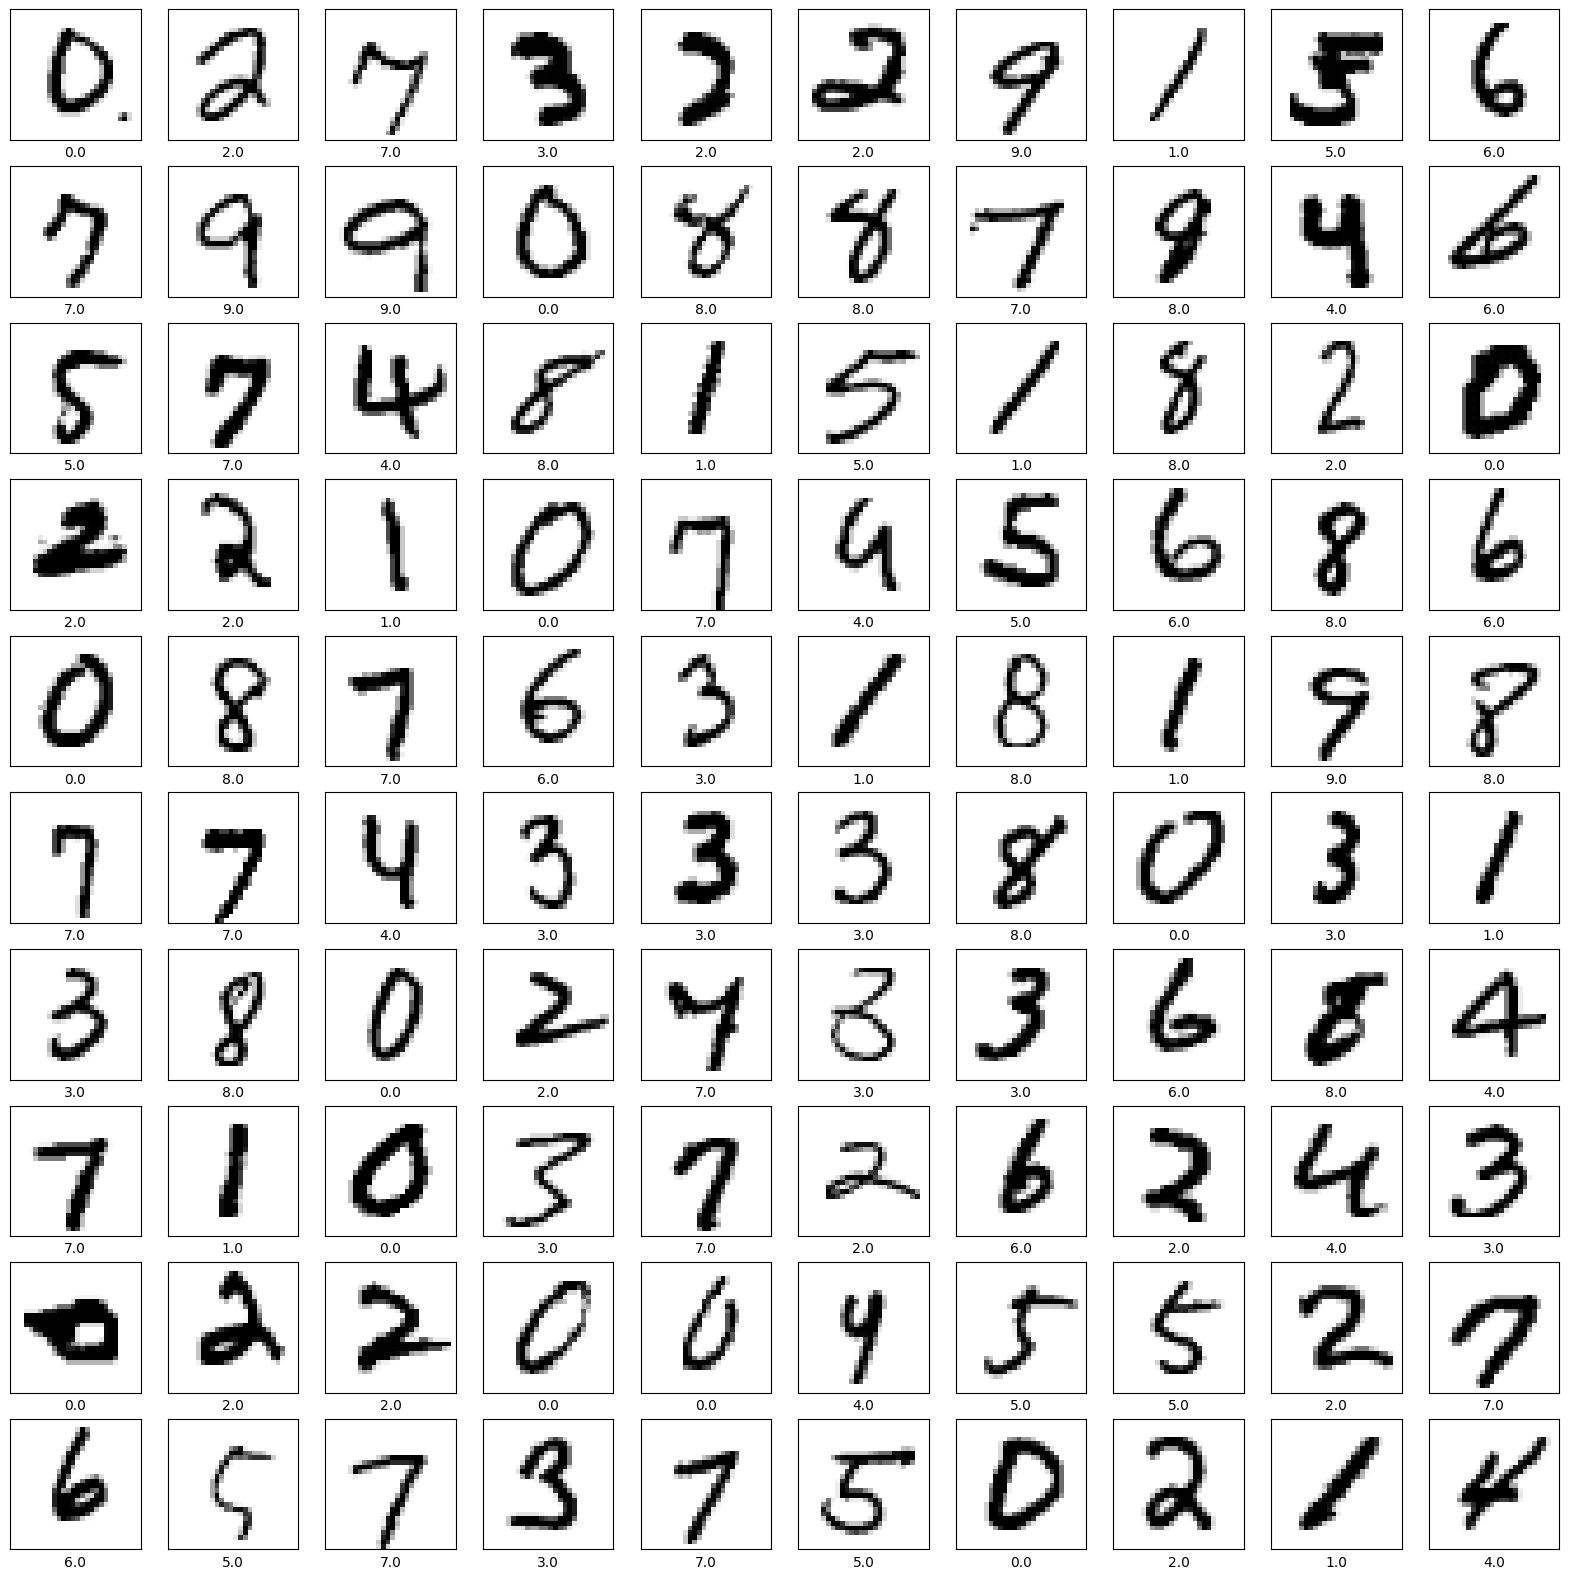

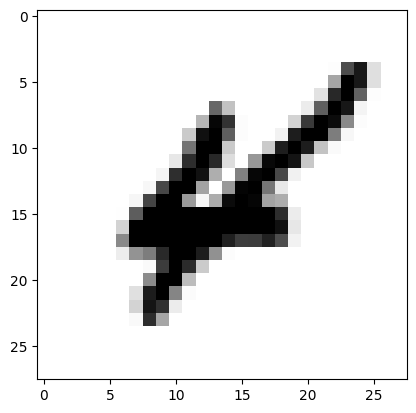

In [ ]:
import math
import matplotlib.pyplot as plt

numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))  # Ensures a square grid

plt.figure(figsize=(20, 20))  # Large figure for better visibility

for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i + 1)  # Arrange subplots
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)  # Display image

    # Ensure `y_train_re[i]` is a string for labeling
    plt.xlabel(str(y_train_re[i]))

plt.show()
plt.imshow(x_train_re[i].squeeze(), cmap=plt.cm.binary)


In [ ]:
# Ensure IMAGE_CHANNELS is 1 for grayscale
IMAGE_CHANNELS = 1

# Reshape the training data
x_train_with_channels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

# Reshape the validation data
x_validation_with_channels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

# Reshape the test data
x_test_with_channels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
print('x_train_with_channels shape:', x_train_with_channels.shape)
print('x_validation_with_channels shape:', x_validation_with_channels.shape)
print('x_test_with_channels shape:', x_test_with_channels.shape)


x_train_with_channels shape: (6876, 28, 28, 1)
x_validation_with_channels shape: (1720, 28, 28, 1)
x_test_with_channels shape: (10914, 28, 28, 1)


In [ ]:
# Normalize the pixel values to the range [0, 1]
x_train_normalized = x_train_with_channels / 255
x_validation_normalized = x_validation_with_channels / 255
x_test_normalized = x_test_with_channels / 255
print(f'x_train_normalized shape: {x_train_normalized.shape}')
print(f'x_validation_normalized shape: {x_validation_normalized.shape}')
print(f'x_test_normalized shape: {x_test_normalized.shape}')

# Check value range
print(f'Value range in x_train_normalized: {x_train_normalized.min()} to {x_train_normalized.max()}')


x_train_normalized shape: (6876, 28, 28, 1)
x_validation_normalized shape: (1720, 28, 28, 1)
x_test_normalized shape: (10914, 28, 28, 1)
Value range in x_train_normalized: 0.0 to 1.0


In [ ]:
x_train_normalized[0][10]



array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.11764706],
       [0.89411765],
       [0.98823529],
       [0.5372549 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.31372549],
       [0.94117647],
       [0.98823529],
       [0.16862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pip install pydot graphviz


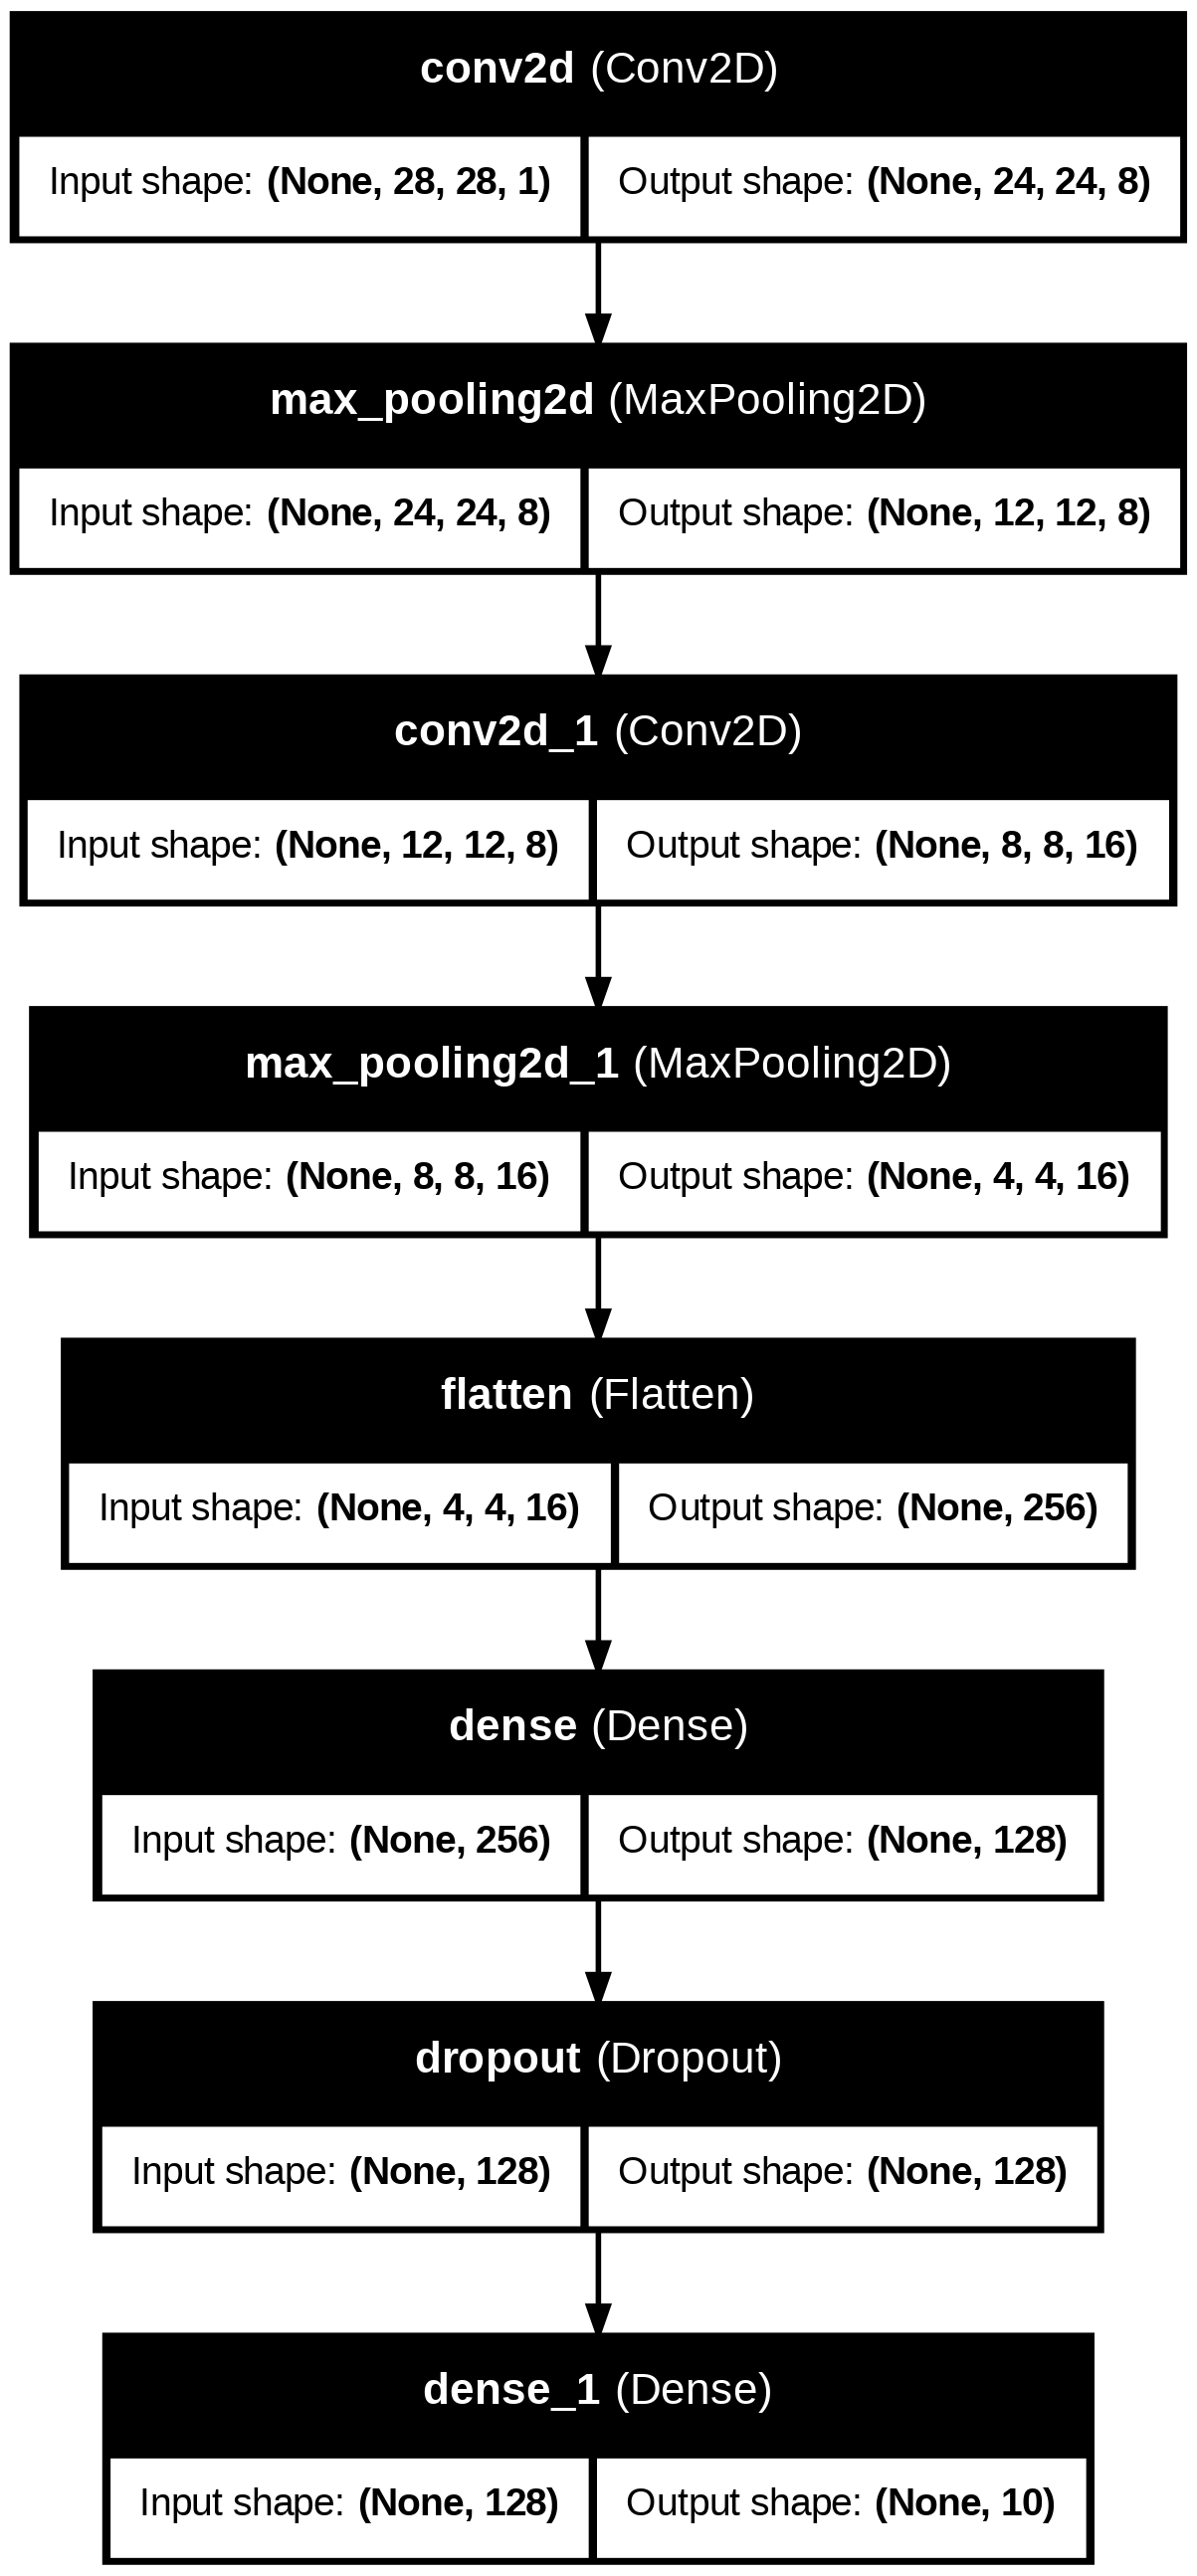

In [ ]:
import tensorflow as tf

# Assuming 'model' is your Keras model
tf.keras.utils.plot_model(
    model,
    show_shapes=True,  # Show input/output shapes of layers
    show_layer_names=True,  # Show the names of layers
)


In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5805 - loss: 1.3559 - val_accuracy: 0.9273 - val_loss: 0.2323
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9320 - loss: 0.2119 - val_accuracy: 0.9459 - val_loss: 0.1669
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9545 - loss: 0.1401 - val_accuracy: 0.9657 - val_loss: 0.1118
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9706 - loss: 0.0900 - val_accuracy: 0.9715 - val_loss: 0.1078
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9751 - loss: 0.0773 - val_accuracy: 0.9703 - val_loss: 0.1005
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9801 - loss: 0.0611 - val_accuracy: 0.9733 - val_loss: 0.0953
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9858 - loss: 0.0491 - val_accuracy: 0.9727 - val_loss: 0.0972
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9883 - loss: 0.0391 - val_accu

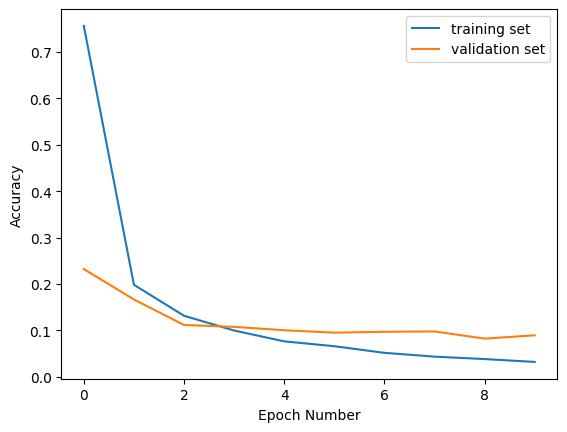

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

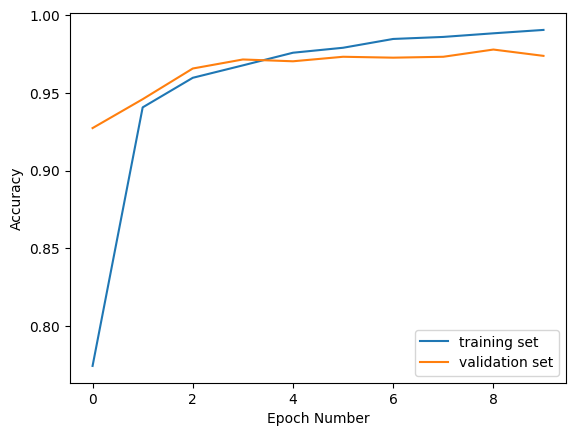

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [ ]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.019054723903536797
Train accuracy:  0.9946189522743225


In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)


Validation loss:  0.08958546072244644
Validation accuracy:  0.9738371968269348


In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

21/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)


predictions_one_hot: (1720, 10)


In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,7.629901e-07,1.415232e-08,2.284247e-07,9.995419e-01,3.308809e-07,4.519325e-04,4.071583e-10,4.508247e-08,7.868819e-07,4.034397e-06
1,4.838850e-07,4.668507e-08,1.139639e-05,9.460911e-08,3.064486e-08,7.381557e-06,2.525460e-08,7.746669e-05,9.998126e-01,9.061647e-05
2,3.799301e-12,5.084526e-10,9.997687e-01,3.134746e-09,5.837445e-11,3.178216e-15,4.126122e-13,2.312450e-04,1.454499e-08,2.422442e-12
3,5.851899e-08,9.995965e-01,2.332159e-05,2.634740e-05,1.052245e-04,1.047372e-05,8.705013e-08,1.387666e-04,5.311045e-05,4.605435e-05
4,9.999560e-01,1.576494e-05,1.958676e-06,1.697734e-08,1.718872e-07,3.292392e-07,1.873163e-07,3.479504e-06,2.060086e-05,1.615586e-06
...,...,...,...,...,...,...,...,...,...,...
1715,7.242249e-08,4.240737e-09,5.121255e-07,2.902314e-07,3.719363e-05,1.137969e-08,1.959788e-10,5.448118e-03,2.032547e-06,9.945117e-01
1716,1.919334e-07,5.340371e-10,5.679106e-10,6.951256e-15,1.619494e-07,4.518818e-08,9.999996e-01,1.572462e-10,5.372518e-08,2.392124e-13
1717,2.134593e-06,9.998038e-01,2.734047e-06,7.519535e-07,4.240131e-05,5.264474e-06,4.196644e-06,1.096191e-04,1.012018e-05,1.897988e-05
1718,9.999852e-01,1.195488e-06,5.542787e-07,4.745463e-10,4.536355e-07,2.734083e-09,8.152343e-07,8.900623e-06,7.851240e-07,2.064031e-06


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,3
1,8
2,2
3,1
4,0
...,...
1715,9
1716,6
1717,1
1718,0


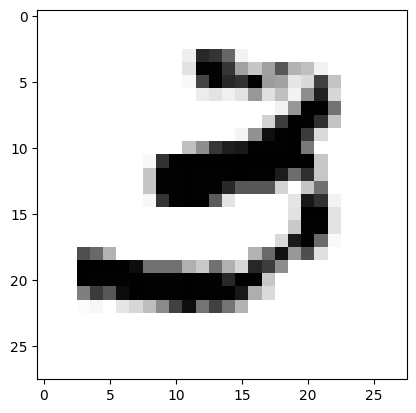

In [ ]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

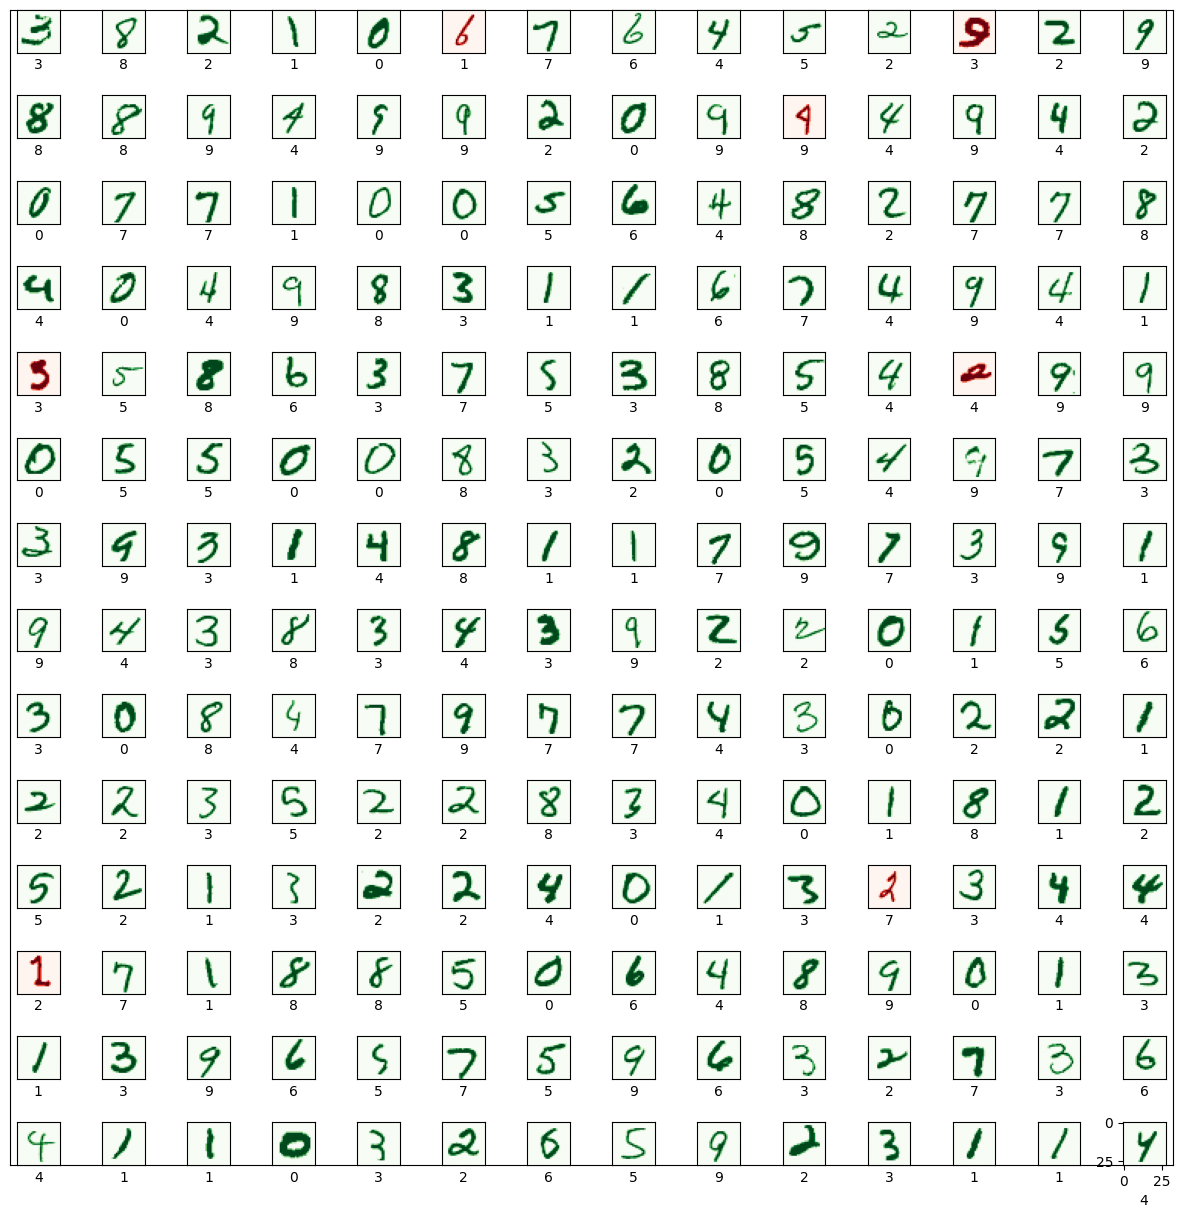

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

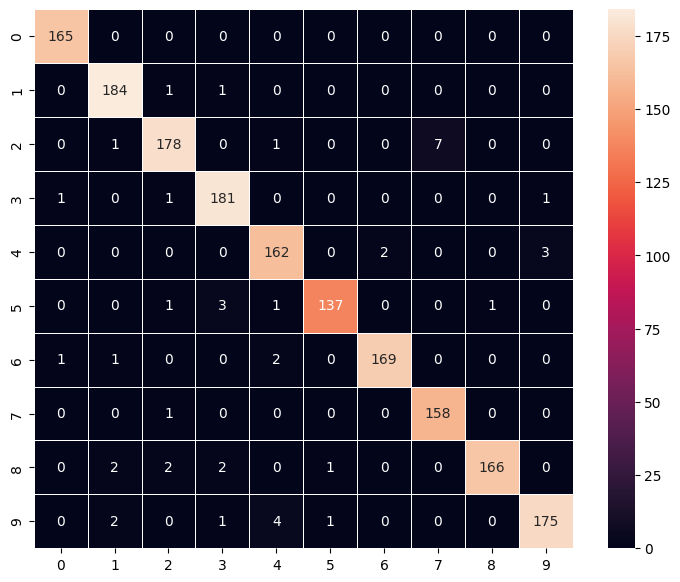

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
predictions_one_hot: (10914, 10)


In [ ]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,8.943892e-10,1.069877e-11,9.999511e-01,5.255101e-08,8.557160e-13,6.727897e-14,1.385621e-13,4.874013e-05,9.248462e-08,4.170306e-10
1,9.999982e-01,7.230874e-10,4.149814e-07,3.242726e-08,5.725344e-13,3.202740e-07,2.103223e-08,7.310806e-07,9.699668e-10,2.237972e-07
2,4.304411e-07,1.993113e-06,7.852451e-06,3.442212e-05,9.607633e-04,7.813084e-06,5.030020e-09,1.175141e-04,4.146602e-03,9.947225e-01
3,2.030495e-02,1.833015e-06,1.918964e-03,2.225950e-04,1.190094e-05,1.152589e-05,2.524212e-05,2.680951e-01,6.643010e-05,7.093413e-01
4,2.995660e-08,1.674163e-07,4.961161e-05,9.997871e-01,5.672727e-09,1.016346e-06,4.674815e-11,1.459439e-08,1.607890e-04,1.310584e-06
...,...,...,...,...,...,...,...,...,...,...
10909,2.453670e-07,1.576920e-13,2.700415e-08,7.233406e-07,1.945232e-12,9.352740e-08,5.763945e-16,9.998488e-01,5.736124e-11,1.501950e-04
10910,8.861516e-06,5.388831e-05,3.555657e-01,1.723140e-03,3.371527e-07,1.393972e-07,1.477400e-07,6.401978e-01,2.438042e-03,1.181387e-05
10911,8.625262e-06,1.221021e-09,2.303605e-06,4.499796e-06,7.072640e-08,2.140983e-05,8.918844e-10,2.372526e-10,9.999505e-01,1.249674e-05
10912,9.999623e-01,4.476917e-07,5.056907e-07,2.568480e-07,4.187686e-08,2.550184e-07,6.375980e-07,1.764830e-05,3.908769e-08,1.786423e-05


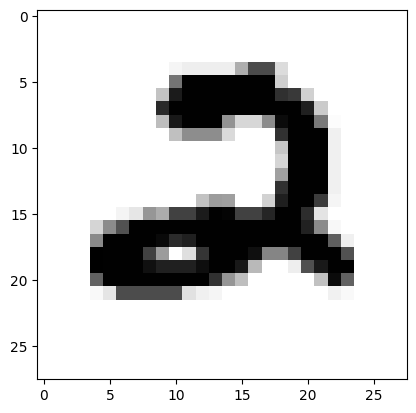

In [ ]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [ ]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<ipython-input-53-8c82cb1ad17a>:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))


,ImageId,Label
0,1,2.0
1,2,0.0
2,3,9.0
3,4,9.0
4,5,3.0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=test_pred)

https://docs.google.com/spreadsheets/d/1awKQ5u0BR9oKE3WksCkhWlMZwjk759XJWkZ9PYZ9nx4#gid=0


In [ ]:
test_pred.to_csv('submission.csv', index = False)

**Expected Output:**

Running this code will generate a graphical representation of your CNN model and save it as model_architecture.png in your working directory.

You will see:

Layer names (e.g., Conv2D, MaxPooling2D, Dense).
Shapes of the tensors passing through each layer.
Connections showing how the data flows from one layer to the next

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

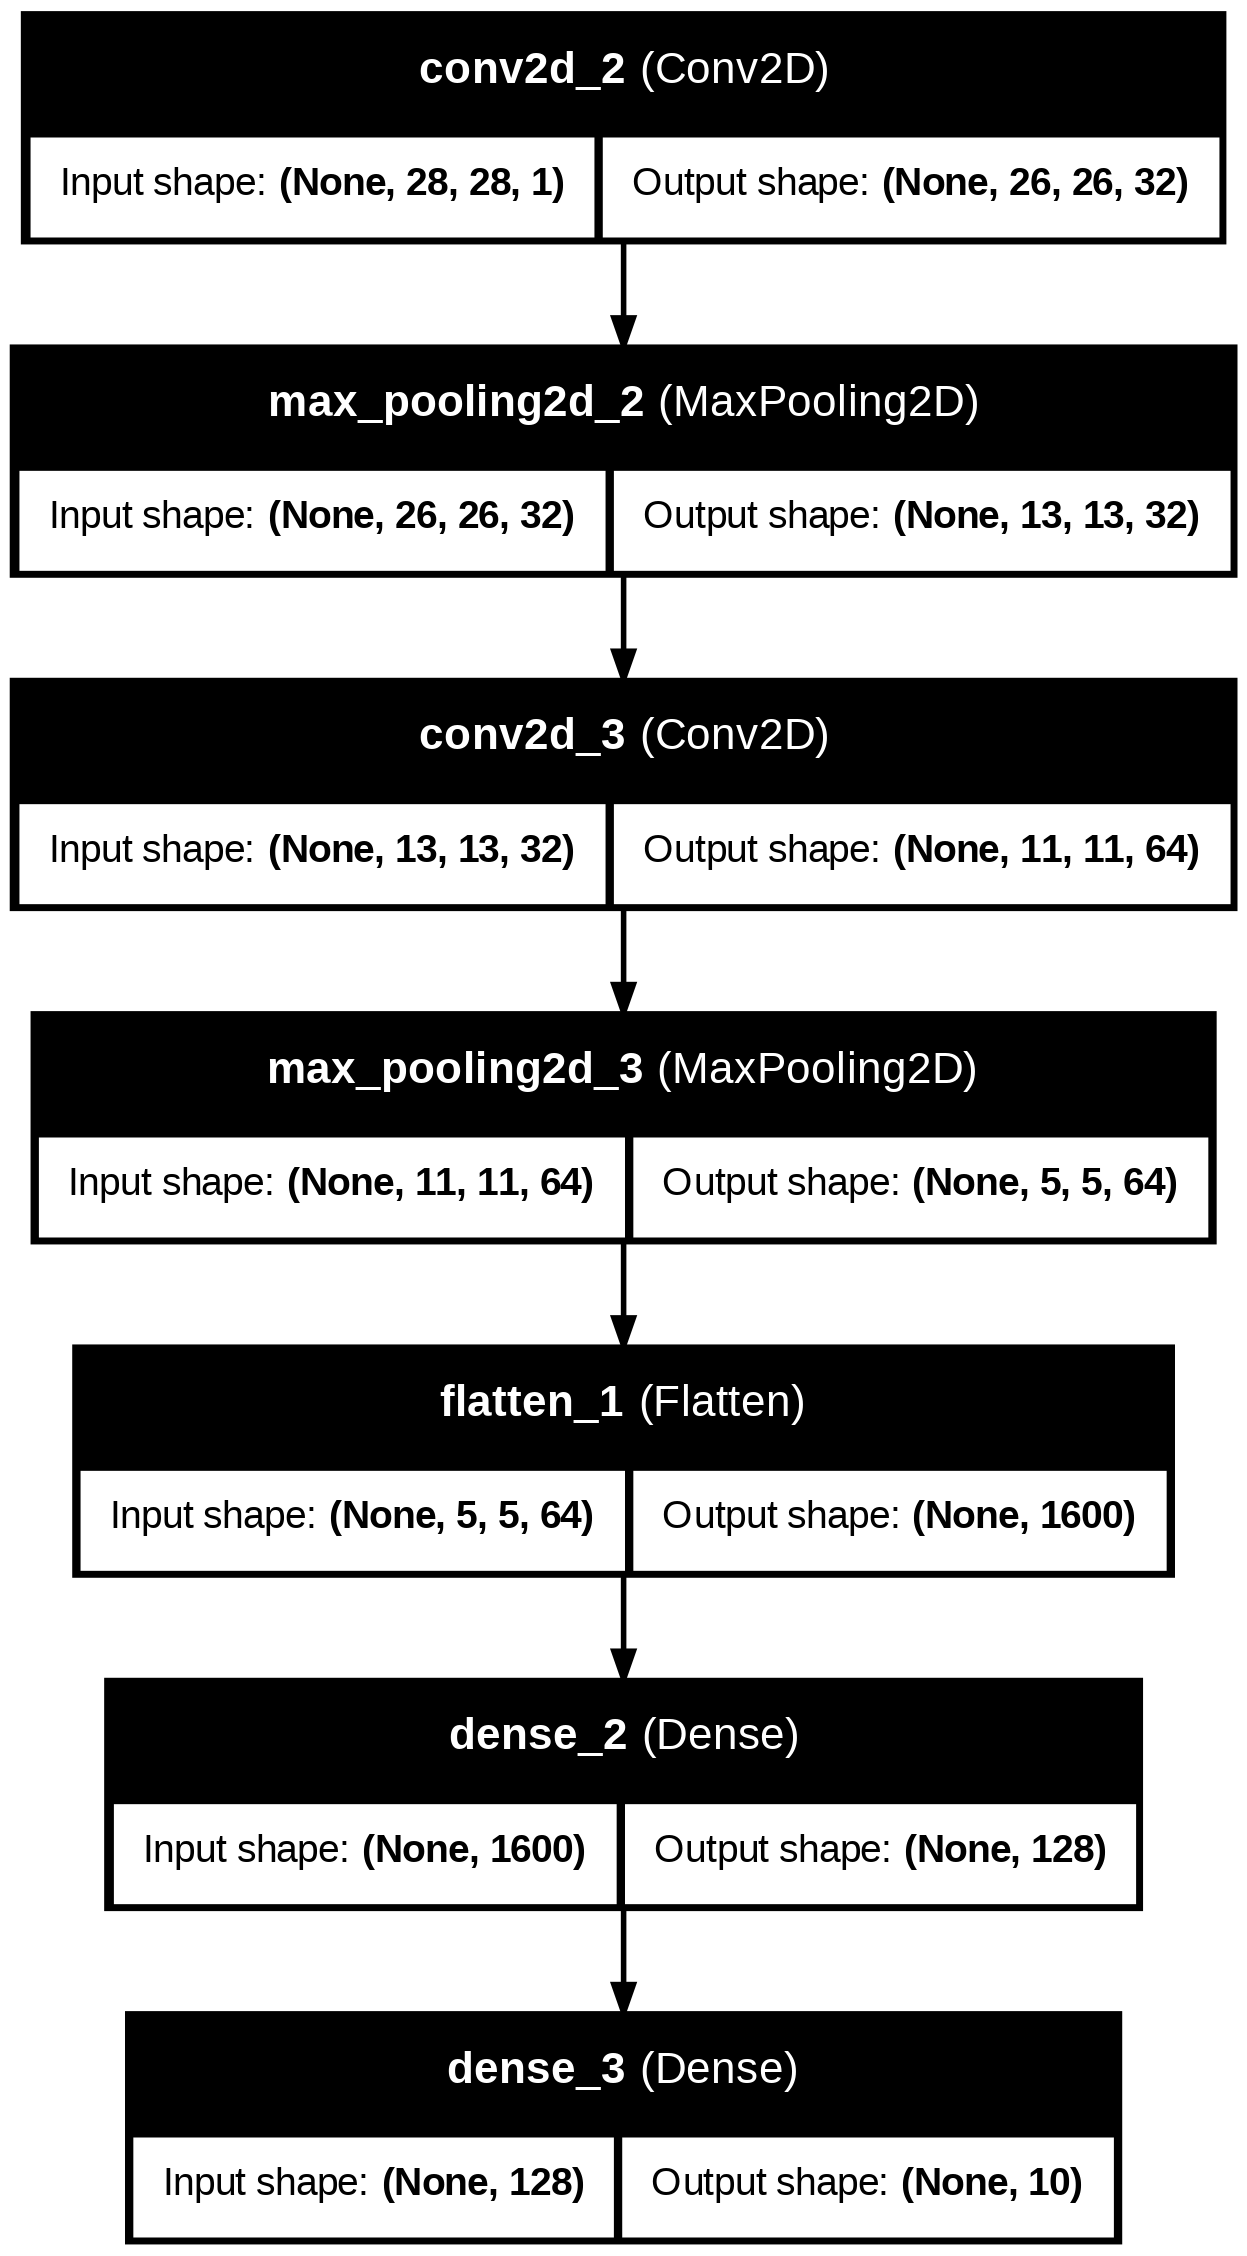

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Summarize the model (optional)
model.summary()

# Plot the model architecture
tf.keras.utils.plot_model(
    model,
    show_shapes=True,  # Display the shape of the tensors at each layer
    show_layer_names=True,  # Display the layer names
    to_file='model_architecture.png'  # Save the plot as an image file
)
